In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import os

### Подготовка данных для использования нейросетью

In [2]:
dirname = os.path.join(os.path.abspath(os.curdir), 'data', 'underwork')

raw_data = {"3":(), "5":(), "8":(), "10":(), "14":(), "15":()}
for v in raw_data:
    tsdf_c = pd.read_csv(os.path.join(os.sep, dirname, v, 'calm_p.csv'))
    tsdf_w = pd.read_csv(os.path.join(os.sep, dirname, v,  'work_p.csv'))
    tsdf_m = pd.read_csv(os.path.join(os.sep, dirname, v, 'meta_p.csv'))
    raw_data[v] = (tsdf_c, tsdf_w, tsdf_m)

In [3]:
data = {"3":(), "5":(), "8":(), "10":(), "14":(), "15":()}

for v in raw_data:
    calm = raw_data[v][0]
    work = raw_data[v][1]
    sex = raw_data[v][2].iloc[0]["values"]
    weight = raw_data[v][2].iloc[1]["values"]
    height = raw_data[v][2].iloc[2]["values"]
    calm["sex"] = sex
    calm["weight"] = weight
    calm["height"] = height
    calm["state"] = 0
    work["sex"] = sex
    work["weight"] = weight
    work["height"] = height
    work["state"] = 1
    data[v] = (calm, work)

In [4]:
validation = {"25":(), "27":()}
for v in validation:
    calm = pd.read_csv(os.path.join(os.sep, dirname, v, 'calm_p.csv'))
    work = pd.read_csv(os.path.join(os.sep, dirname, v,  'work_p.csv'))
    tsdf_m = pd.read_csv(os.path.join(os.sep, dirname, v, 'meta_p.csv'))
    sex = tsdf_m.iloc[0]["values"]
    weight = tsdf_m.iloc[1]["values"]
    height = tsdf_m.iloc[2]["values"]
    calm["sex"] = sex
    calm["weight"] = weight
    calm["height"] = height
    calm["state"] = 0
    work["sex"] = sex
    work["weight"] = weight
    work["height"] = height
    work["state"] = 1
    validation[v] = (calm, work)

# LSTM

#### Нейронные сети

Искусственная нейронная сеть представляет собой слоистую структуру из связанных
нейронов, вдохновленную биологическими нейронными сетями. Это не один алгоритм,
а комбинация различных алгоритмов, которая позволяет нам выполнять сложные
операции с данными.

#### Рекуррентные нейронные сети
Рекуррентные нейронные сети (RNN) — это класс нейронных сетей, которые хороши
для моделирования последовательных данных, таких как временные ряды или
естественный язык, значения сенсоров в течении некоторого временного промежутка.
В общем смысле, RNN применяются в моделировании языка (англ. Language Modelling)
и генерация текста, распознавании речи, генерации описания к изображениям (не
только текстового, но и по возможным другим параметрам) или маркировке видео
(англ. Video Tagging)

Подобно нейронным сетям с прямой связью (англ. Feedforward Neural Network, FNN)
и CNN, рекуррентные нейронные сети используют обучающие данные для изменения
своих весов. Основным отличием от других видов сетей является ''память'', суть
которой в том, что в процессе обработки входной информации текущим слоем в RNN,
используются входные параметры к некоторым предыдущим слоям сети (таким образом
влияя на результат работы текущего слоя сети). В то время как традиционные
глубокие нейронные сети предполагают, что входные и выходные данные слоев
независимы друг от друга, выходы рекуррентных нейронных сетей зависят от
предшествующих элементов внутри последовательности этих слоев. Хотя будущие
преобразования также могут быть полезны для определения результата данной
последовательности, однонаправленные рекуррентные нейронные сети не могут
учитывать эти преобразования в своих прогнозах.

Однако при использовании первых архитектур RNN возникала проблема потери
способности связывать информацию из-за уменьшения аргументов слоев сети на
текущий обрабатываемый слой при увеличении ''расстояния'' между слоем (то есть
чем дальше слой $B$ от слоя $A$, тем меньше слой $A$ влияет на слой $B$). Время
от времени значение градиента может становиться бесконечно малым, что
препятствует обновлению значения веса. На практике была представлена реализация
модификации рекуррентной нейросети, которая способна к обучению долговременным
зависимостям. Название такого подкласса RNN "--- сеть с долгой краткосрочной
памятью (англ. Long Short-Term Memory, LSTM).

![Виды ячеек разных сетей](pics/rnn-lstm.png "Title")

![Легенда](pics/legend.png "Title")

#### LSTM

Это особый вид рекуррентной нейронной сети, способной изучать долгосрочные
зависимости в данных. Это достигается за счет того, что повторяющийся модуль
модели имеет комбинацию четырех слоев, взаимодействующих друг с другом.

На рисунке посередине изображены четыре слоя нейронной сети LSTM в желтых
прямоугольниках ($\sigma$, $\tanh$), ввод через $x_t$ и состояние ячейки через
$h_t$. Модуль LSTM имеет состояние ячейки и три шлюза, что дает им возможность
выборочно изучать, отключать или сохранять информацию от каждого из модулей.
Состояние ячейки в LSTM помогает информации проходить через единицы без
изменения, позволяя только несколько линейных взаимодействий.

Таким образом, для каждого элемента входной последовательности каждый $t$-ый слой
LSTM модели осуществляет следующие вычисления:

$$i_t = \sigma(W_{ii} x_t + b_{ii} + W_{hi} h_{t - 1} + b_{hi}) ;$$
$$f_t = \sigma(W_{if} x_t + b_{if} + W_{hf} h_{t - 1} + b_{hf}) ;$$
$$g_t = \tanh(W_{ig} x_t + b_{ig} + W_{hg} h_{t - 1} + b_{hg}) ;$$
$$o_t = \sigma(W_{io} x_t + b_{io} + W_{ho} h_{t - 1} + b_{ho}) ;$$
$$c_t = f_t \odot c_{t - 1} + i_t \odot g_t ;$$
$$h_t = o_t \odot \tanh(c_t) ,$$

где $h_t, c_t, x_t$ - скрытое состояние слоя модели, состояние клетки и
входной параметр в момент времени $t$ соответственно; $h_{t - 1}$ определяет
скрытое состояние слоя в момент времени $t - 1$ или начальное скрытое состояние
в момент времени $o$. Элементы $i_t, f_t, g_t, o_t$ являются входными,
забывающими, клеточными и выходными воротами соответственно. Символ $\sigma$
определяет функцию сигмоиды, $\odot$ - поэлементное произведение, также
называемое произведением Адамара.

#### Функция по разделению набора данных на обучающую и тестовую выборки

In [5]:
def data_split(ts, param="1", train_percentage=0.67):
    timeseries = ts[["1"]].values.astype('float32')
    train_size = int(len(timeseries) * train_percentage)
    train, test = timeseries[:train_size], timeseries[train_size:]
    return train, test, timeseries

#### Функция по преобразованию выборки в тензорный вид (необходимый для использования нейросетью)

In [6]:
import torch
 
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

#### С помощью класса описывается базовая нейросеть LSTM
(возможно усложнение архиктуры в целях повышения качества)

In [7]:
import torch.nn as nn
 
class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

#### Создается объект выборки, затем делится на тренировочную и тестовую с помощью функций, описанных выше

In [8]:
ts = pd.DataFrame()

for v in data:
   calm = data[v][0]
   work = data[v][1]
   ts = pd.concat([ts, calm, work], sort=False, axis=0)
print(ts.shape[0])


train, test, total = data_split(ts)
lookback = 1
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)

220000


C:\Users\Mi\AppData\Local\Temp\ipykernel_26720\408042385.py:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:233.)
  return torch.tensor(X), torch.tensor(y)


#### Создается объект нейросети, оптимизатора, функции потерь и объекта загрузчика.
Данные объекты необходимы для осуществления обучения нейросети с помощью
библиотеки pytorch.

Указывается также количество эпох для обучения (итераций)

In [9]:
import numpy as np
import torch.optim as optim
import torch.utils.data as torch_data
 
model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = torch_data.DataLoader(torch_data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

EPOCHS = 20

Описывается функция для обучения

In [10]:
def train_model(model, X_train, X_test, y_train, y_test, n_epochs):
    y_pred_train = None
    y_pred_test = None

    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch in loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # Validation
        if epoch % 10 != 0:
            continue
        model.eval()
        with torch.no_grad():
            y_pred = model(X_train)
            y_pred_train = y_pred
            train_rmse = np.sqrt(loss_fn(y_pred, y_train))
            y_pred = model(X_test)
            y_pred_test = y_pred
            test_rmse = np.sqrt(loss_fn(y_pred, y_test))
        print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
    return y_pred_train, y_pred_test, model

#### Запуск обучения нейросети

In [11]:
y_pred_train, y_pred_test, model = train_model(model, X_train, X_test, y_train, y_test, EPOCHS)

Epoch 0: train RMSE 0.0064, test RMSE 0.0064
Epoch 10: train RMSE 0.0050, test RMSE 0.0061


Сохранение обученной сети

In [12]:
torch.save(model, f"./lstm_forecast_{EPOCHS}_epochs.pth")

### Пример подсчета метрик и построения графика 

In [13]:
import numpy as np
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                            r2_score)
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def validate(true, pred):
    true = pd.DataFrame(true.flatten().numpy())[0]
    pred = pd.DataFrame(pred.flatten().numpy())[0]
    print("MSE:", mean_squared_error(true, pred))
    print("RMSE:", sqrt(mean_squared_error(true, pred)))
    print("MAE:", mean_absolute_error(true, pred))
    print("MAPE:", mean_absolute_percentage_error(true, pred))
    print("R2:", r2_score(true, pred))

In [14]:
def plot_train_n_pred(X_train, X_test, total, model):
    with torch.no_grad():
    # shift train predictions for plotting
        train_plot = np.ones_like(total) * np.nan
        y_pred = model(X_train)
        y_pred = y_pred[:, -1, :]
        train_size = len(X_train)
        train_plot[lookback:train_size + 1] = model(X_train)[:, -1, :]
        # shift test predictions for plotting
        test_plot = np.ones_like(total) * np.nan
        test_plot[train_size + lookback:len(total) - 1] = model(X_test)[:, -1, :]

    plt.rcParams["figure.figsize"] = [12, 7]
    plt.plot(total, c='b')
    plt.plot(train_plot, c='r')
    plt.plot(test_plot, c='g')
    plt.show()

In [15]:
def validate_on_new_users(model):
    for v in validation:
        calm = validation[v][0]
        work = validation[v][1]
        valid = pd.concat([calm, work], sort=False, axis=0)
        valid_train, valid_test, valid_total = data_split(valid)
        
        lookback = 1
        X_train, _ = create_dataset(valid_train, lookback=lookback)
        X_test, y_test = create_dataset(valid_test, lookback=lookback)

        y_pred = model(X_test)
        y_pred_test = y_pred
        
        print(f"Метрики для пациента {v}:")
        try:
            validate(y_pred_test, y_test)
        except:
            validate(y_pred_test.detach(), y_test.detach())
        plot_train_n_pred(X_train, X_test, valid_total, model)

Вывод значений метрик, а также построение графика

Метрики для пациента 25:
MSE: 1.4986564e-05
RMSE: 0.003871248333010792
MAE: 0.0022872947
MAPE: 0.17272747354581952
R2: 0.995068174574753


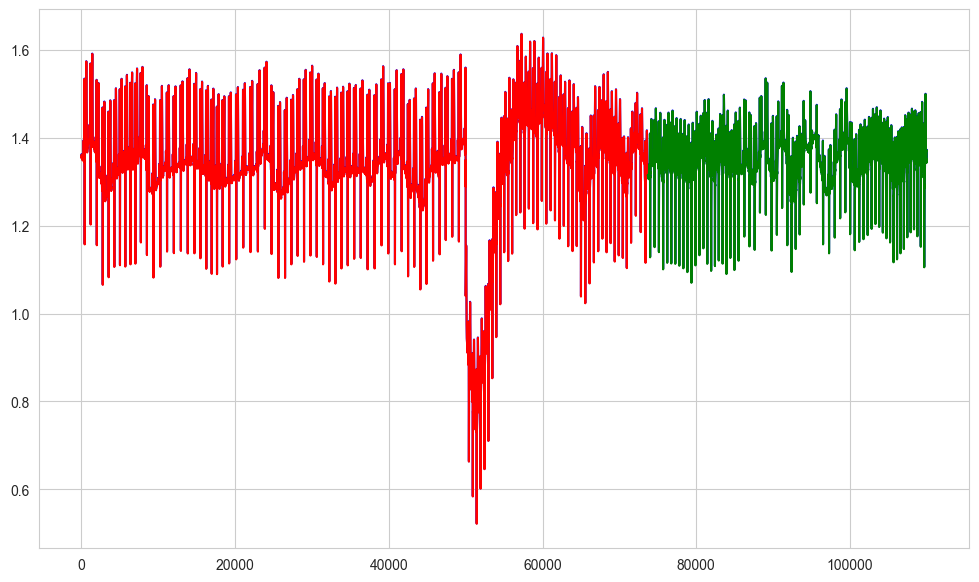

In [16]:
validate_on_new_users(model)